# import thư viện, tạo dữ liệu

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(3)

In [2]:
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

X = np.vstack((np.ones((1, X.shape[1])), X)) # mỗi cột là 1 điểm dữ liệu
X

array([[1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ],
       [0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 1.75, 2.  , 2.25, 2.5 , 2.75,
        3.  , 3.25, 3.5 , 4.  , 4.25, 4.5 , 4.75, 5.  , 5.5 ]])

$$\sigma(s) = \frac{1}{1 + e^{-s}}$$

In [3]:
def sigmoid(s): # hàm sigmoid
    return 1/(1 + np.exp(-s))

Hàm mất mát của logistic regression:
$$ \begin{eqnarray}
J(\mathbf{w}) = -\log P(\mathbf{y}|\mathbf{X}; \mathbf{w}) \newline
= -\sum_{i=1}^N(y_i \log {z}_i + (1-y_i) \log (1 - {z}_i))
\end{eqnarray}$$ 
Đạo hàm $\nabla$ của J
$$\frac{\partial J(\mathbf{w}; \mathbf{x}_i, y_i)}{\partial \mathbf{w}} = (z_i - y_i)\mathbf{x}_i$$
$\rightarrow$ Công thức cập nhật w:
$$\mathbf{w} = \mathbf{w} + \eta(y_i - z_i)\mathbf{x}_i$$ 
với $z_i$ là hàm sigmoid: $z_i = f(w^Tx) = \sigma(w^Tx) = \frac{1}{1 + e^{-w^Tx}}$

In [4]:
def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count=10000):
    w = [w_init]
    d, N = X.shape
    check_w_after, count = 20, 0
    while count < max_count:
        
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1) # vì dữ liệu ở dạng cột nên lấy cột thứ i
                                    # ra thì cần đưa nó về dạng dx1
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            
            if count % check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

thuật toán lặp tối đa 10000 lần,
```
if count % check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
```
Điều kiện dừng đầu tiên được kiểm tra sau mỗi `check_w_after` lần cập nhật trọng số. Cụ thể, ta tính khoảng cách Euclidean giữa trọng số mới nhất `w_new` và trọng số được cập nhật `check_w_after` lần trước đó `w[-check_w_after]` (với `w` là danh sách các trọng số đã được cập nhật). Nếu khoảng cách này nhỏ hơn ngưỡng `tol`, tức là các trọng số đã không thay đổi đáng kể trong khoảng `check_w_after` lần cập nhật, thuật toán sẽ dừng và trả về danh sách các trọng số đã học được.

In [5]:
eta = .05
d = X.shape[0]
w_init = np.random.randn(d, 1)
w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])

[[-4.10544014]
 [ 1.50739974]]


điều này có nghĩa là $z_i = \sigma(-4.1 + 1.5x) = \frac{1}{1 + e^{-4.1 + 1.5x}}$

In [6]:
# In ra y_pred
print(sigmoid(np.dot(w[-1].T, X)))

[[0.03383822 0.04857322 0.06926464 0.09786365 0.13653875 0.18732433
  0.18732433 0.25149766 0.32876177 0.41655279 0.50997596 0.60270746
  0.68860573 0.76322796 0.87260148 0.90896055 0.93570742 0.95498538
  0.96867639 0.98500985]]


In [7]:
# Vẽ đồ thị
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

`np.where(y == value)` trả về 1 mảng các chỉ số của mảng y sao cho giá trị tại điểm đó bằng 0 <br>
`X[1, np.where(y == 0)]` trả về hàng thứ 1, với các dòng là các chỉ số của `np.where(y == value)`

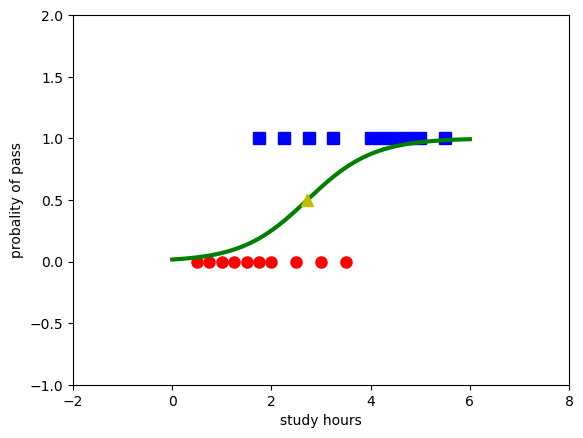

In [8]:
plt.plot(X0, y0, 'ro', markersize=8)
plt.plot(X1, y1, 'bs', markersize=8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])

plt.plot(xx, yy, 'g-', linewidth=3)
plt.plot(threshold, .5, 'y^', markersize=8)
plt.ylabel('probality of pass')
plt.xlabel('study hours')
plt.show()

In [9]:
# dự đoán điểm
X_test = np.array([[3, 4, 1, 2, 3, 10]])
X_test = np.vstack((np.ones((1, X_test.shape[1])), X_test))
y_pred = sigmoid(np.dot(w[-1].T, X_test))
y_pred

array([[0.60270746, 0.87260148, 0.06926464, 0.25149766, 0.60270746,
        0.99998277]])

In [10]:
for i in range(X_test.shape[1]):
    print('study', X_test[1][i], end='')
    if y_pred[0][i] >= 0.5:
        print(' pass')
    else: print(' fail')

study 3.0 pass
study 4.0 pass
study 1.0 fail
study 2.0 fail
study 3.0 pass
study 10.0 pass


# Sử dụng thư viện scikit-learn
Trong sklearn, mỗi dữ liệu yêu cầu là 1 dòng <br>
`fit_intercept=False` nếu bạn đã thêm cột 1 <br>
`fit_intercept=True` nếu bạn chưa thêm cột 1

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
X1 = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]]).T
y1 = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
print(X1.shape, y1.shape)
logistic = LogisticRegression()
logistic.fit(X1, y1)
print(logistic.predict(np.array([[2]])))

(20, 1) (20,)
[0]


Việc thêm cột 1 để dùng trong `sklearn.linear_model` chỉ được khi dữ liệu gốc ban đầu có từ 2 features (2 cột) trở lên, nếu không sẽ gây lỗi

In [24]:
x_dat = np.random.rand(5, 3)
y = np.random.randint(0, 2, size=5)
x_new = np.hstack((np.ones((x_dat.shape[0], 1)), x_dat))
model = LogisticRegression(fit_intercept=True) # đã thêm cột 1
print(x_dat)
model.fit(x_new, y_dat)
model.predict(np.array([[1, 2, 2, 1]]))

[[0.06829515 0.29373866 0.34441826]
 [0.03420923 0.2064702  0.18780166]
 [0.18225294 0.65483642 0.54627612]
 [0.18208242 0.18877449 0.31782257]
 [0.01145511 0.30276609 0.65681127]]


array([1])

In [17]:
import numpy as np
from sklearn.linear_model import LogisticRegression

X = np.random.rand(5, 3)
y = np.random.randint(0, 2, size=5)
print(X.shape)
X_new = np.hstack((np.ones((X.shape[0], 1)), X))
print(X_new.shape)
clf = LogisticRegression(fit_intercept=True)

clf.fit(X_new, y)





(5, 3)
(5, 4)


LogisticRegression()